In [2]:
import nltk

from nltk.corpus import stopwords 

from nltk.tokenize import word_tokenize 

from os.path import join

#common words online "list":
w_file='C:\\Users\hello\Desktop\ML\c1_stop.py'

f= open(w_file,'r')

lines=f.readlines()

c=[]
for i in lines:
    c.append(i.rstrip())

#example scentence
#example_sent = "This is a sample sentence, showing off the stop words filtration A."
#common stop words nltk "set/dictionary":  
stop_words = set(stopwords.words('english'))
stop_words.update(',','.')

#append set to list
#better than update lisrt to set
for i in stop_words:
    if i not in c:
        c.append(i)

#convert list to set
c=set(c)

#word_tokens = word_tokenize(example_sent) 
  
# print(c)


# filtered_sentence = [] 
  
# for w in word_tokens: 
#     if w.lower() not in stop_words: 
#         filtered_sentence.append(w) 
  
# print(word_tokens) 
# print(filtered_sentence) 

In [3]:
from os import listdir
from os.path import isfile, join
mypath = 'C:\\Users\hello\Desktop\ML\datasets'

# onlyfiles = [i for f in listdir(mypath) for i in listdir(join(mypath,f)) if isfile(join(mypath, f,i))]
# onlyfiles
r=[]
for i in listdir(mypath):
    a = listdir(join('C:\\Users\hello\Desktop\ML\datasets', i ))
    r.append((i,a))

In [4]:
#COMPILLING DATA FROM 20000 ACTUAL NEWS ARTICLES
vocab={}
for i in r:
    #print(i[0])
    count=0
    for j in i[1]:
        if count<900:
            file = join('C:\\Users\hello\Desktop\ML\datasets', i[0],j )
            f = open(file, "r")
            a = f.readlines()
            for k in a:
                for l in k.rstrip().split():
                    if l.lower() in stop_words:
                        pass
                    elif l.lower() in vocab and l.isalpha():  
                        vocab[l.lower()]+=1
                    elif l.lower() not in vocab and l.isalpha():vocab[l.lower()]=1
            count+=1     


In [5]:
S=sorted(vocab.items(),key=lambda kv:kv[1], reverse=True)

res = [[ i for i in range(len(S)) ], 
       [ j for i, j in S ]] 

# type(S)
# len(S)
# lists = sorted(vocab.items())

# x, y = zip(lists)


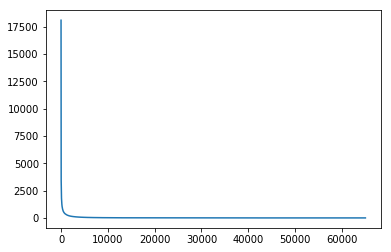

In [7]:
from matplotlib import pyplot as plt
plt.plot(res[0],res[1])
plt.show()
%matplotlib inline

In [8]:
#selecting a cutoff point from above plot
import numpy as np
S[1500:2500]
features = S[:2500]
element = [i for i , j in features]
# element
# element.index('room')
# row = [0 for i in range(900)]
# row[2] = 1
# X_test=[]
# X_test.append([2,3,4])
# print(X_test)

In [9]:
#COMPILLING DATA FROM 20000 ACTUAL NEWS ARTICLES

X=[]
Y=[]
for i in r:
    #print(i[0])
    count=0
    for j in i[1]:
        if count<900:
            file = join('C:\\Users\hello\Desktop\ML\datasets', i[0],j )
            f = open(file, "r")
            a = f.readlines()
            row=[0 for i in element]
            Y.append(i[0])
            for k in a:
                for l in k.rstrip().split():
                    if l.lower() in stop_words:
                        pass
                    elif l.lower() in element and l.isalpha():
                        pos = element.index(l.lower())
                        row[pos]+=1
            X.append(row)  
            count+=1


In [10]:
print(np.shape(X),np.shape(Y))

#Y append above has i[0]


(18000, 2500) (18000,)


In [11]:
X_test=[]
Y_test=[]
for i in r:
    #print(i[0])
    count=0
    for j in i[1][900:998]:
        if count<100:
            file = join('C:\\Users\hello\Desktop\ML\datasets', i[0],j )
            f = open(file, "r")
            a = f.readlines()
            row=[0 for i in element]
            Y_test.append(i[0])
            for k in a:
                for l in k.rstrip().split():
                    if l.lower() in stop_words:
                        pass
                    elif l.lower() in element and l.isalpha():
                        pos = element.index(l.lower())
                        row[pos]+=1
            X_test.append(row)  
            count+=1
count

98

In [12]:
%%time
print(np.shape(X_test),np.shape(Y_test))

(1959, 2500) (1959,)
Wall time: 574 ms


In [14]:
xtest=np.array(X_test)
ytest=np.array(Y_test)
xtrain=np.array(X)
ytrain=np.array(Y)


In [15]:
def fit(x,y):
    dict_={}
    #classes
    l=[]
    classes=set(y)
    for i in classes:
        dict_[i]={}
        current_class_rows=(y==i)
        current_class_rows_x=x[current_class_rows]
        current_class_rows_y=y[current_class_rows]
        #print(len(current_class_rows_y))
        count=0
        feature_len=(current_class_rows_x.shape[1])
        for j in range(feature_len):
            dict_[i][j]=current_class_rows_x[:,j].sum()
        dict_[i]['classtotal']=current_class_rows_x.sum()
    return(dict_)        

In [51]:
def predict(dict_,x,y):
    print(y)
    min_= -1000
    best_class=''
    for classes in set(dict_.keys()):
        print(classes)
        p=0
        for j in range(len(x)):
            #probabilty of word j of xtest from dict
            if x[j] < 1:
                continue
            p+=(np.log(dict_[classes][j]+1)-np.log(dict_[classes]['classtotal']+2500))
        print(p*(1/20))
        if min_ < p:
            min_=p
            best_class=classes
    return(best_class)

In [60]:
#now calling fit on #xtrain xtest ytrain ytest
dict_=fit(xtrain,ytrain)
c=predict(dict_,xtest[3],ytest[3])
print('-->',c)

alt.atheism
comp.sys.ibm.pc.hardware
-32.541890356891884
rec.autos
-30.89314417357447
rec.motorcycles
-31.19925100801117
rec.sport.baseball
-31.08704509898545
rec.sport.hockey
-32.18508568021732
comp.graphics
-32.1671331088752
talk.politics.misc
-29.65802799283539
talk.politics.guns
-30.32072113755953
sci.electronics
-32.01235746517669
soc.religion.christian
-29.072028870896588
comp.windows.x
-33.0989348136413
misc.forsale
-33.24693011642527
comp.sys.mac.hardware
-32.171228221493855
talk.politics.mideast
-30.672238304578038
talk.religion.misc
-29.3066846545463
comp.os.ms-windows.misc
-32.24135409889928
sci.crypt
-31.53116905761508
sci.med
-30.750053832705333
sci.space
-31.433113454779654
alt.atheism
-28.346538877300283
--> alt.atheism


In [61]:
p+=i[j]*(dict_[classes][j]/dict_[classes]['classtotal'])

NameError: name 'p' is not defined